# Projects in Machine Learning HW2
 Yu-Kai "Steven" Wang

Load and prepare same dataset as HW1

In [1]:
import idx2numpy
import numpy as np
from matplotlib import pyplot as plt

In [2]:
train_imgs = idx2numpy.convert_from_file('../data/MNIST/train-images-idx3-ubyte/train-images.idx3-ubyte')
train_lbls = idx2numpy.convert_from_file('../data/MNIST/train-labels-idx1-ubyte/train-labels.idx1-ubyte')
test_imgs = idx2numpy.convert_from_file('../data/MNIST/t10k-images-idx3-ubyte/t10k-images.idx3-ubyte')
test_lbls = idx2numpy.convert_from_file('../data/MNIST/t10k-labels-idx1-ubyte/t10k-labels.idx1-ubyte')

In [3]:
print(train_imgs.shape)
print(train_lbls.shape)
print(test_imgs.shape)
print(test_lbls.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Extract images "0" and "1"

In [4]:
train_dataset = train_imgs[(train_lbls == 0) | (train_lbls == 1)]
train_label = train_lbls[(train_lbls == 0) | (train_lbls == 1)]
test_dataset = test_imgs[(test_lbls == 0) | (test_lbls == 1)]
test_label = test_lbls[(test_lbls == 0) | (test_lbls == 1)]
print(train_dataset.shape)
print(train_label.shape)
print(test_dataset.shape)
print(test_label.shape)

(12665, 28, 28)
(12665,)
(2115, 28, 28)
(2115,)


normalize and reduce data

In [5]:
train_dataset = train_dataset / 255
train_dataset = train_dataset[:, 4:24, 4:24]
test_dataset = test_dataset / 255
test_dataset = test_dataset[:, 4:24, 4:24]

Sample visualization

Label: 0


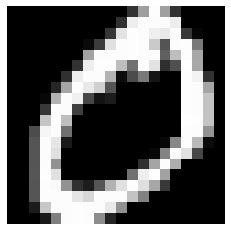

In [6]:
plt.imshow(train_dataset[0], cmap='gray')
plt.axis('off')
print(f'Label: {train_label[0]}')

Feature engineering (2 features)

In [7]:
def extract_feature(data):
    feat1 = np.mean(data[:, :10, :] - data[:, 10:, :], axis=(1,2))
    feat2 = np.sum(data[:, 8:14, 8:14], axis=(1,2))
    return np.vstack((feat1, feat2))

In [8]:
train_feats = extract_feature(train_dataset)
train_feats.shape

(2, 12665)

In [9]:
test_feats = extract_feature(test_dataset)
test_feats.shape

(2, 2115)

Feature visualization

Text(0, 0.5, 'top_half')

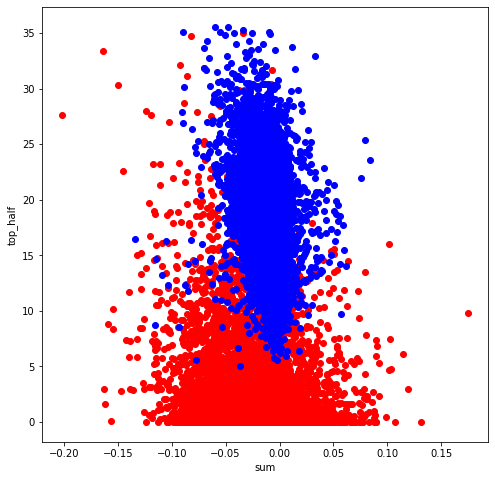

In [10]:
plt.figure(figsize=(8,8))
plt.scatter(train_feats[0, train_label == 0], train_feats[1, train_label == 0], color='red')
plt.scatter(train_feats[0, train_label == 1], train_feats[1, train_label == 1], color='blue')
plt.xlabel('sum')
plt.ylabel('top_half')

## Task1: Decision Tree

In [11]:
from sklearn import tree

Decision Tree if Gini Impurity Loss

In [29]:
clf = tree.DecisionTreeClassifier(criterion='gini')
clf.fit(train_feats.T, train_label.T)
print(f'Test Accuracy: {clf.score(test_feats.T, test_label.T):.3f}')

Test Accuracy: 0.963


Decision Tree with Entropy Loss

In [30]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(train_feats.T, train_label.T)
print(f'Test Accuracy: {clf.score(test_feats.T, test_label.T):.3f}')

Test Accuracy: 0.959


For my decision trees I tried using two different criterions (*Gini Impurity* and *Entropy Loss*) to compute the quality of the split. This results in a slight difference in the test accuracy, with the tree using *Entropy Loss* having a lower accuracy than the one using *Gini Impurity*.

## Task 2: Bagging and Boosting

Random Forest (Bagging)

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
bagging_clf = RandomForestClassifier(n_estimators=10)
bagging_clf.fit(train_feats.T, train_label.T)
print(f'Test Accuracy: {bagging_clf.score(test_feats.T, test_label.T):.3f}')

Test Accuracy: 0.974


Ada Boost (Boosting)

In [44]:
from sklearn.ensemble import AdaBoostClassifier

In [45]:
boosting_clf = AdaBoostClassifier(n_estimators=10)
boosting_clf.fit(train_feats.T, train_label.T)
print(f'Test Accuracy: {boosting_clf.score(test_feats.T, test_label.T):.3f}')

Test Accuracy: 0.973


K-fold Cross Validation

In [46]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

In [64]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
bagging_clf_score = cross_val_score(bagging_clf, test_feats.T, test_label.T, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
boosting_clf_score = cross_val_score(boosting_clf, test_feats.T, test_label.T, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print(f'[Bagging]  Test Accuracy: {np.mean(bagging_clf_score):.3f}, Standard Deviation: {np.std(bagging_clf_score):.6f}')
print(f'[Boosting] Test Accuracy: {np.mean(boosting_clf_score):.3f}, Standard Deviation: {np.std(boosting_clf_score):.6f}')

[Bagging]  Test Accuracy: 0.973, Standard Deviation: 0.007564
[Boosting] Test Accuracy: 0.970, Standard Deviation: 0.012474


Judging by the test accuracy alone, Random Forest has a slight advantage over Ada Boost. Notice by applying the ensembling methods, both accuracies have all increased around 1 ~ 2 %. Also, we can see that Random Forest not only has a higher accuracy than Ada Boost, but it also has a smaller standard deviation. In this case we can conclude that Random Forest is a better method for dealing with this problem.

## Task 3: Comparison

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [80]:
for name, model in zip(['Decision Tree', 'Random Forest', 'Ada Boost'], [clf, bagging_clf, boosting_clf]):
    print(f'\nEvaluating Model "{name}"')
    y_pred = model.predict(test_feats.T)
    cm = confusion_matrix(test_label.T, y_pred)
    print('Confusion Matrix:')
    print(cm)
    print(f'Accuracy: {accuracy_score(test_label.T, y_pred):.3f}')


Evaluating Model "Decision Tree"
Confusion Matrix:
[[ 951   29]
 [  57 1078]]
Accuracy: 0.959

Evaluating Model "Random Forest"
Confusion Matrix:
[[ 952   28]
 [  27 1108]]
Accuracy: 0.974

Evaluating Model "Ada Boost"
Confusion Matrix:
[[ 945   35]
 [  23 1112]]
Accuracy: 0.973


The metric I am using here for comparison is the Accuracy. I chose this metric because it is the most straightforward measure in this case for a balanced binary classification dataset. Judging by this metric only the ranking of the methods would be **Random Forest** > **Ada Boost** > **Decision Tree**.

If instead of accuracy, I choose to use precision as the metric:

In [82]:
for name, model in zip(['Decision Tree', 'Random Forest', 'Ada Boost'], [clf, bagging_clf, boosting_clf]):
    print(f'\nEvaluating Model "{name}"')
    y_pred = model.predict(test_feats.T)
    cm = confusion_matrix(test_label.T, y_pred)
    print('Confusion Matrix:')
    print(cm)
    print(f'Precision: {precision_score(test_label.T, y_pred):.3f}')


Evaluating Model "Decision Tree"
Confusion Matrix:
[[ 951   29]
 [  57 1078]]
Precision: 0.974

Evaluating Model "Random Forest"
Confusion Matrix:
[[ 952   28]
 [  27 1108]]
Precision: 0.975

Evaluating Model "Ada Boost"
Confusion Matrix:
[[ 945   35]
 [  23 1112]]
Precision: 0.969


We can see that even though all models performs farily well, the ranking of the models now becomes **Random Forest** > **Decision Tree** > **Ada Boost**.